##Programming 1 - Assignment 2
######Your name(s):
Andrew Harper, Andrew Singh


---



#### Preparation: Load the required packages.


In [15]:
library(tidyverse)

####Q1:Load the World values survey data "WorldValues3.csv" and save it as WorldData. Load the country code data "CountryCodes3.csv" and save it as CountryData.






In [2]:
WorldData = read.csv("WorldValues3.csv")
CountryData = read.csv("CountryCodes3.csv")



---


####Q2: Join the country name from the CountryCode data into WorldData. Note that country code is called *ID* in CountryData and *CountryCode* in WorldData. Return the first 10 unique countries.

In [19]:
# Perform a join to add countrycode to WorldData
WorldData <- left_join(WorldData, CountryData, by = c("CountryCode" = "ID"))

# Return the first 10 unique countries
unique_countries <-head( unique(WorldData$Country),10)
print(unique_countries)

 [1] "Ethiopia"   "Zimbabwe"   "Tajikistan" "Pakistan"   "Bangladesh"
 [6] "Nigeria"    "Myanmar"    "Kyrgyzstan" "Nicaragua"  "Viet Nam"  




---


####Q3: Update WorldData by dropping income, education, and lifeexpect variables. What is the dimension of the updated WorldData?



In [4]:
# Drop Income, Education, and life expect
WorldData <- WorldData %>% select(-Income, -Education, - lifeexpect)

# Get the dimension of the updated WorldData
dim(WorldData)


[1] 69578     7


---


####Q4: Using pipes, calculate the average age and percent immigrant (i.e., average ratio of immigrants) for every country. Display the top 5 countries in terms of average age. Hint: For displaying the top 5, refer to the help for slice( ) to find the right form of the function to use. Calculate percent immigrant for every country in dataset.


In [20]:
# Calculate average age and percent immigrant for every country
CountryStats <- WorldData %>%
  group_by(Country) %>%  summarize(avg_age = mean((2024-BirthYear)),percent_immigrant = mean(Immigrant)*100)


# Display the top 5 countries in terms of average age
top_5_countries <- CountryStats %>%
  arrange(desc(avg_age)) %>%
  slice_head(n = 5)

# Print the top 5 countries
print(top_5_countries)

# A tibble: 5 × 3
  Country     avg_age percent_immigrant
  <chr>         <dbl>             <dbl>
1 Japan          60.0              56.4
2 Greece         57.9              53.1
3 Germany        57.6              51.4
4 Andorra        53.0              49.3
5 South Korea    52.6              51.2




---


####Q5: Group WorldData by country and marital status and show the percent of people in each category who are immigrants. Show the results for China. (the coding for the *Marital* variable is 1 = Married, 2 = Living together, 3 = Divorced, 4 = Separated, 5 = Widowed, and 6 = Single).

In [21]:
ImmigrantStats <- WorldData %>%
  group_by(Country, Marital) %>%
  summarise(
    percent_immigrant = mean(Immigrant, na.rm = TRUE) * 100
  )

# Filter the results for China
ChinaImmigrantStats <- ImmigrantStats %>%
  filter(Country == "China")

# Print the results for China
print(ChinaImmigrantStats)

`summarise()` has grouped output by 'Country'. You can override using the
`.groups` argument.


# A tibble: 7 × 3
# Groups:   Country [1]
  Country Marital percent_immigrant
  <chr>     <int>             <dbl>
1 China         1              55.4
2 China         2              57.1
3 China         3              46.6
4 China         4              60  
5 China         5              81.6
6 China         6              45.8
7 China        NA              55.6




---


####Q6: Using pipes, create a function that takes a country name and calculates its average life satisfaction ("Satisfied") broken down by "immigrant". Name this function meanSat. Show the results for China.



In [7]:
# Define the function meanSat
meanSat <- function(country_name) {
  WorldData %>%
    filter(Country == country_name) %>%
    group_by(Immigrant) %>%
    summarise(
      avg_satisfaction = mean(Satisfied, na.rm = TRUE)
    )
}

# Show the results for China
ChinaSatisfaction <- meanSat("China")

# Print the results for China
print(ChinaSatisfaction)

# A tibble: 2 × 2
  Immigrant avg_satisfaction
      <int>            <dbl>
1         0             7.35
2         1             7.47



---

#Part 2:
#### Load the web analytics data "WebAnalytics3.csv" and save it as analytics.


In [8]:
analytics = read.csv("WebAnalytics3.csv")



---


####Q7: Use base R to draw the scatterplot of TimeOnPage (x axis) versus PageViews (y axis). Make sure to change the shape, color, and size of the points. Also, set your own labels for both axes and add a title to the plot. In addition, set a limit on the x axis to be between 0 and 300,000.


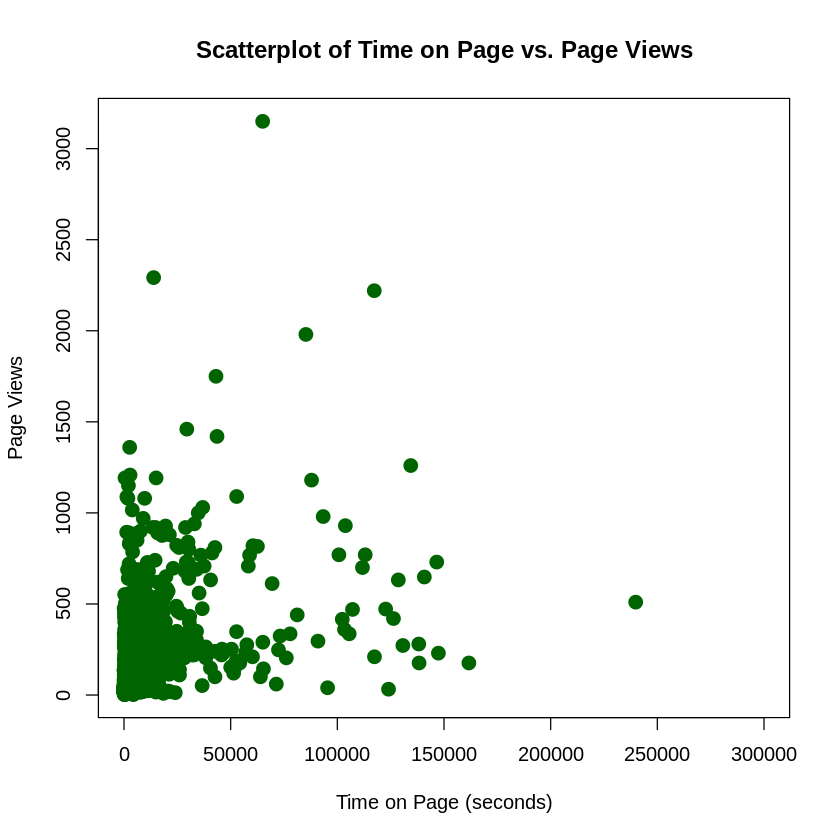

In [22]:
plot(analytics$TimeOnPage, analytics$PageViews,
     pch = 19, # Change the shape of the points
     col = "darkgreen", # Change the color of the points
     cex = 1.5, # Change the size of the points
     xlab = "Time on Page (seconds)", # Set the x-axis label
     ylab = "Page Views", # Set the y-axis label
     main = "Scatterplot of Time on Page vs. Page Views", # Add a title to the plot
     xlim = c(0, 300000) # Set the limit on the x-axis
)



---


####Q8: Recreate the same plot using ggplot. (You can refer to ggplot cheatsheet or its reference page online for an overview of all the arguments.For example, here are some examples of geom_point() options: https://ggplot2.tidyverse.org/reference/geom_point.html)

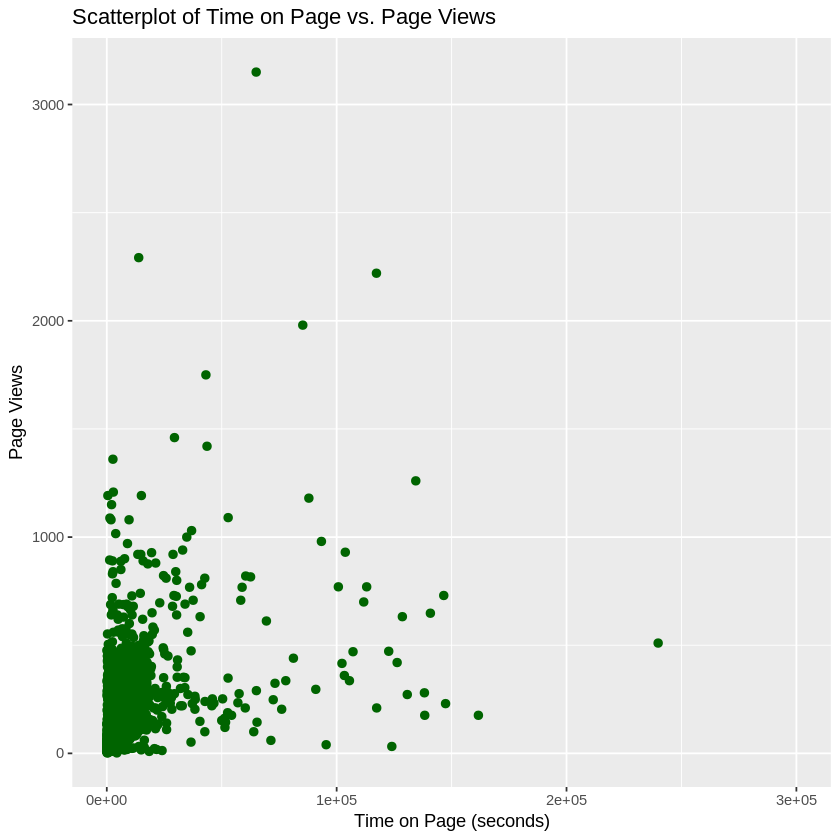

In [23]:
ggplot(analytics, aes(x = TimeOnPage, y = PageViews)) +
  geom_point(shape = 19, color = "darkgreen", size = 2) + # Change the shape, color, and size of the points
  labs(
    x = "Time on Page (seconds)", # Set the x-axis label
    y = "Page Views", # Set the y-axis label
    title = "Scatterplot of Time on Page vs. Page Views" # Add a title to the plot
  ) +
  xlim(0, 300000) # Set a limit on the x-axis




---


####Q9:
* a. Use ggplot to draw the scatterplot of TotalDownloads (x axis) versus ConversionRate (y axis).
* b. Draw a similar plot but add jitters. Use a theme and a color.

#### (For both parts, read TotalDownloads as a factor for visual clarity on the x axis.)


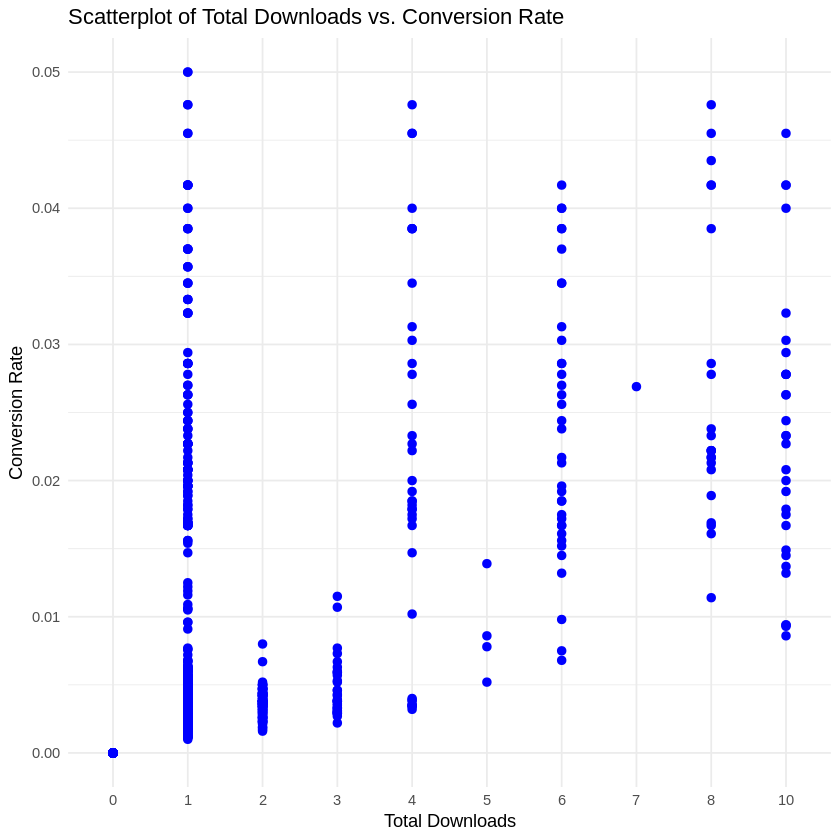

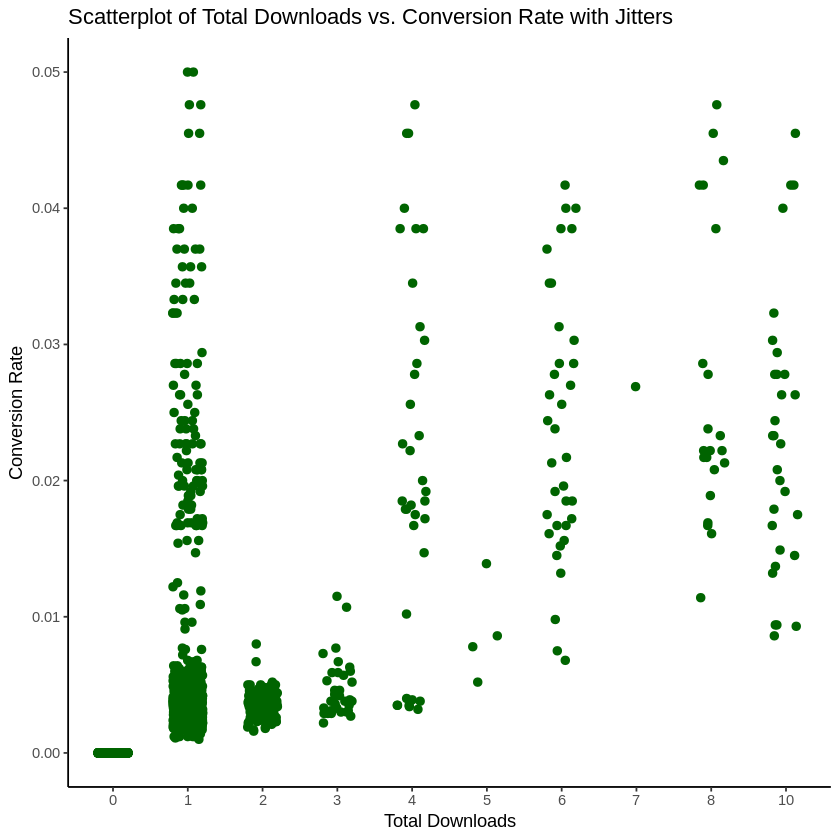

In [24]:
# Convert TotalDownloads to a factor for visual clarity on the x axis
analytics$TotalDownloads <- as.factor(analytics$TotalDownloads)

# Create the scatterplot
ggplot(analytics, aes(x = TotalDownloads, y = ConversionRate)) +
  geom_point(shape = 19, color = "blue", size = 2) + # Customize the points
  labs(
    x = "Total Downloads", # Set the x-axis label
    y = "Conversion Rate", # Set the y-axis label
    title = "Scatterplot of Total Downloads vs. Conversion Rate" # Add a title to the plot
  ) +
  theme_minimal() # Use a minimal theme

# Create the scatterplot with jitters
ggplot(analytics, aes(x = TotalDownloads, y = ConversionRate)) +
  geom_jitter(shape = 19, color = "darkgreen", size = 2, width = 0.2, height = 0) + # Add jitters and customize the points
  labs(
    x = "Total Downloads", # Set the x-axis label
    y = "Conversion Rate", # Set the y-axis label
    title = "Scatterplot of Total Downloads vs. Conversion Rate with Jitters" # Add a title to the plot
  ) +
  theme_classic() # Use a classic theme



---


####Q10: Create a boxplot with Region as categories (x-axis) and ConversionRate as the outcome of interest (y-axis). Change the (border/points) color of the boxplots. In addition, add a title, a subtitle, and a blank x axis label. In so doing, adjust the location, size, and the color of the title and the subtitle.


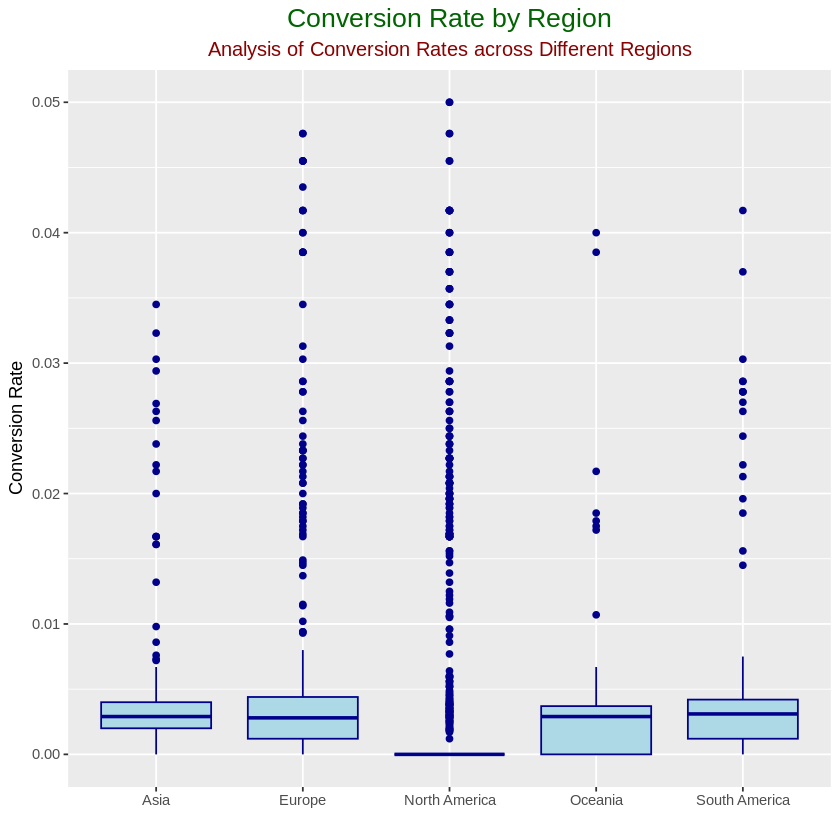

In [13]:
ggplot(analytics, aes(x = Region, y = ConversionRate)) +
  geom_boxplot(color = "darkblue", fill = "lightblue") + # Change the border and fill color of the boxplots
  labs(
    title = "Conversion Rate by Region",
    subtitle = "Analysis of Conversion Rates across Different Regions",
    x = "", # Blank x-axis label
    y = "Conversion Rate"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, color = "darkgreen"), # Adjust title location, size, and color
    plot.subtitle = element_text(hjust = 0.5, size = 12, color = "darkred") # Adjust subtitle location, size, and color
  )




---


####Q11: Create the same box plot of Q10 but use facet wrap to separate by Source. Also, fill each boxplot with different colors based on Source and add a color legend to the bottom of the plot.



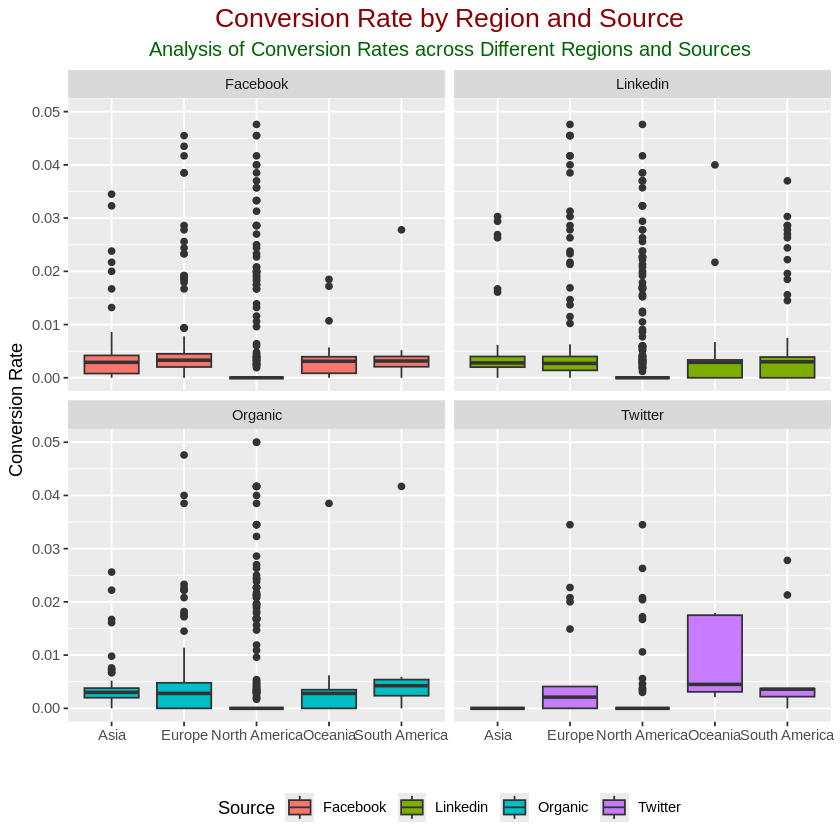

In [14]:
ggplot(analytics, aes(x = Region, y = ConversionRate, fill = Source)) +
  geom_boxplot() +
  facet_wrap(~ Source) +
  labs(
    title = "Conversion Rate by Region and Source",
    subtitle = "Analysis of Conversion Rates across Different Regions and Sources",
    x = "", # Blank x-axis label
    y = "Conversion Rate"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, color = "darkred"), # Adjust title location, size, and color
    plot.subtitle = element_text(hjust = 0.5, size = 12, color = "darkgreen"), # Adjust subtitle location, size, and color
    legend.position = "bottom" # Position the legend at the bottom
  )
